# DS 3000 - Practicum 3

**Student Name**: Noelle Marcel, HwiJoon Lee, Hazem Algendy, Shreyashi Kalakuntla

**Date**: 04-01-2025

## Selected data set
The dataset that you will work with is called CDC Diabetes Health IndicatorsLinks to an external site. that was obtained from the Behavioral Risk Factor Surveillance System (BRFSS) which is publicly available on the CDC's websiteLinks to an external site.. The purpose of BRFSS is to collect data on various health-related factors. The CDC estimates that millions of Americans are either unaware that they have diabetes or are at risk i.e. they are pre-diabetic. There are many factors that influence the prevalence of diabetes, such as age, location, race, and other social determinants of healthLinks to an external site.. Your objective is to classify the target variable, which indicates whether a patient is diabetic, pre-diabetic, or healthy.
Data: diabetes_012_health_indicators_BRFSS2015.csvDownload diabetes_012_health_indicators_BRFSS2015.csv
Data dictionary: https://archive.ics.uci.edu/dataset/891/cdc+diabetes+health+indicatorsLinks to an external site.
Note: the dataset has three classes: diabetic, pre-diabetic and no diabetes.
 

## Question 1: 

In your own words, formulate the Data Science problem.


Using health indicator data collected from the CDC, the objective is to develop a classification model that can predict a patient's diabetic status. This project addresses a critical public health concern, as the CDC estimates that millions of Americans are either unaware of their diabetic condition. The core challenge is to build a predictive model that analyzes various features including age, location, race, and other social determinants of health to accurately classify an individual's diabetic status. This model would serve as a valuable tool for early intervention and risk assessment in diabetes prevention and management.

## Question 2: Prepare the Data (5 pts)
Evaluate the dataset to determine if ALL variables are represented in their expected type. Convert variables to suitable data types for ML modeling. This means that you need to identify categorical data, discrete and continuous variables represent them accordingly.
Analyze the data to determine what preprocessing steps are needed to ensure that the following are handled: 1. missing values, 2. invalid values, 3. outliers. Perform the required data preparation steps and justify the approach that is taken to prepare the data for analysis. 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes_012_health_indicators_BRFSS2015.csv')

# Basic data exploration
print("Data shape:", df.shape)
print(df.isnull().sum())

binary_vars = ['Diabetes_012', 'HighBP', 'HighChol', 'CholCheck', 'Smoker', 
               'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
               'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex']

ordinal_vars = ['GenHlth', 'Age', 'Education', 'Income']

continuous_vars = ['BMI', 'MentHlth', 'PhysHlth'] 

Data shape: (253680, 22)
Diabetes_012            0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


### No Null data found

In [3]:
print("Min/Max values:")
print(df.describe().loc[['min', 'max']].T)

Min/Max values:
                       min   max
Diabetes_012           0.0   2.0
HighBP                 0.0   1.0
HighChol               0.0   1.0
CholCheck              0.0   1.0
BMI                   12.0  98.0
Smoker                 0.0   1.0
Stroke                 0.0   1.0
HeartDiseaseorAttack   0.0   1.0
PhysActivity           0.0   1.0
Fruits                 0.0   1.0
Veggies                0.0   1.0
HvyAlcoholConsump      0.0   1.0
AnyHealthcare          0.0   1.0
NoDocbcCost            0.0   1.0
GenHlth                1.0   5.0
MentHlth               0.0  30.0
PhysHlth               0.0  30.0
DiffWalk               0.0   1.0
Sex                    0.0   1.0
Age                    1.0  13.0
Education              1.0   6.0
Income                 1.0   8.0


### While there are some extreme values in the dataset (such as BMI of 98), all variables appear to remain within their valid definitional ranges. These statistical outliers represent legitimate data points rather than errors requiring correction.

In [9]:
# convert related variables to categorical
for var in binary_vars + ordinal_vars:
    df[var] = df[var].astype('category')

for var in continuous_vars:
    df[var] = df[var].astype('int')

# display the data types of the variables
print(df.dtypes)

Diabetes_012            category
HighBP                  category
HighChol                category
CholCheck               category
BMI                        int64
Smoker                  category
Stroke                  category
HeartDiseaseorAttack    category
PhysActivity            category
Fruits                  category
Veggies                 category
HvyAlcoholConsump       category
AnyHealthcare           category
NoDocbcCost             category
GenHlth                 category
MentHlth                   int64
PhysHlth                   int64
DiffWalk                category
Sex                     category
Age                     category
Education               category
Income                  category
dtype: object


## Question 3:(20 points)
Perform exploratory data analysis. Ensure that you analyze the relationships between the various features and the diabetic outcomes. Create visualizations to demonstrate your findings and explain the results. This is a 20pt question and requires detailed analyses and visualizations.

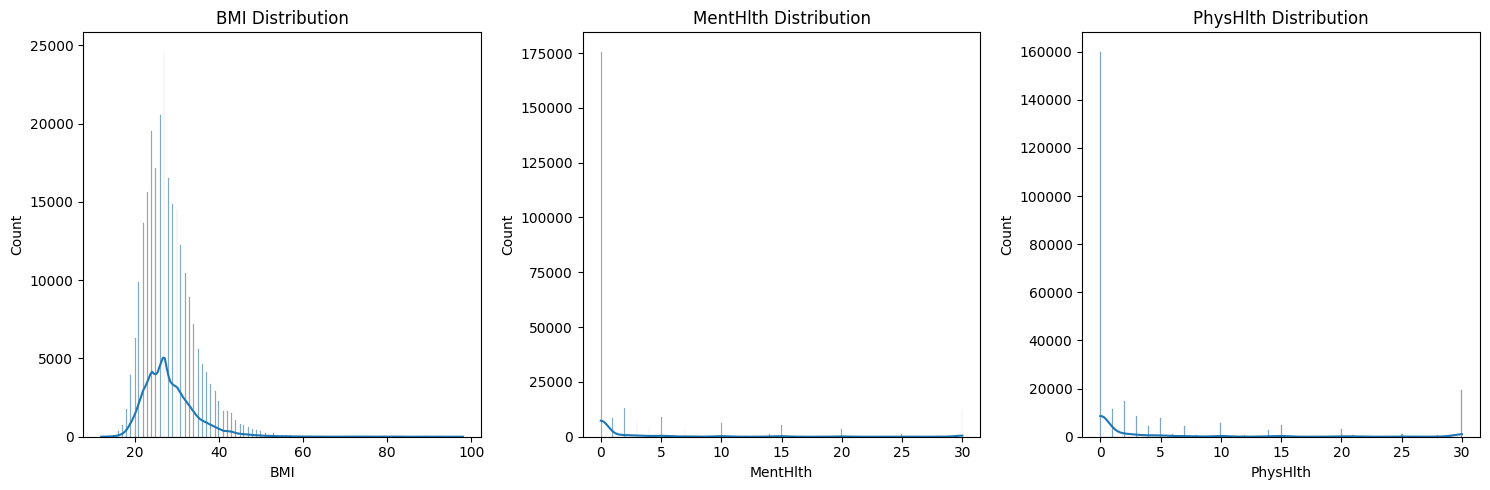

In [10]:
# Visualize distributions of continuous variables
plt.figure(figsize=(15, 5))
for i, col in enumerate(continuous_vars):
    plt.subplot(1, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'{col} Distribution')
plt.tight_layout()
plt.show()

## Question 4a:  (20 points)
Perform significance tests to determine if the patterns that are detected above are statistically significant. Ensure that you discuss at least three patterns and the respective p-values.
Select the features that will be used in the ML models (i.e. your selected features should be based on analytical reasoning that demonstrates their utility for ML modeling. Do not arbitrarily select features.
Note: if you are using correlations, ensure that this is only performed using continuous variables.

## Question 4b: (10 points)
This is an optional challenge question. Its purpose is to identify new features that can be included in the ML modeling below.

Perform ONE of the following
(1) Feature engineering: Machine learning models can benefit from feature engineering. Create a new feature that can be included in the model and perform significance testing to determine if it's statistically significant. Explain the results and justify if the feature will be included in the ML model. If you decide that you will not include the new feature in the ML model, explain the reasons.
OR
(2) Statistical tests: Research a new type of statistical test that was not introduced in this course and write python code to demonstrate at least two significance tests between features in the dataset. Explain the test, the results and justify if the feature will be included in the ML model. If you decide that you will not include the analyzed feature(s) in the ML model, explain the reasons. Note: you are welcome to use libraries to perform the tests.

## Question 5: (5 points)

Partition the data into train/test sets. After which, perform the following:
encode any categorical data. Ensure that categorical variables are represented correctly.
normalize numeric data.
Tip: Ensure that you use sklearn to normalize and/or encode the training data, after which transform the test set (there is an example in the lecture).

## Question 6: (30 points)

Build the ML model that predicts the target variable based on the selected features. Ensure that you:
Demonstrate the training, evaluation and tuning for at least three algorithms that can handle non linear data and multiple input features/variables. NOTE: you can only select one tree-based algorithm and you must select multiple input features for the ML modeling.
Use GridSearchCV to tune at least two hyperparameters for each algorithm.
Note: do not change the input features in your experiments.

## Question 7: (15 points)

Analyze the evaluated models. For each algorithm, ensure that you:
Display: 1) the best model and 2) the best score that was obtained.
Evaluate the scores from GridSearchCV for the training set and the test set to diagnose any bias-variance problems. Comment on the quality of the model.
NOTE: seeing that you are analyzing healthcare data, ensure that you discuss what is the desired metric to evaluate the results based on the machine learning task e.g. accuracy, precision, recall, f1-score, MSE, R2, etc.

## Question 8: (5 points)

Discuss the potential impacts of your solution. Who will benefit from (and/or who will be affected by) your solution and why.
Were there any concerns of bias in the ML modeling seeing that you were analyzing sensitive data? Create visualizations to share any analysis of bias in the training data and/or the predictions from the model. For example: you can compare and contrast the predictions for specific groups to demonstrate your findings. Provide recommendations on techniques to address any issues that were found.
Note: you are welcome to use libraries to perform the analysis.